In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.naive_bayes import  GaussianNB
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import  accuracy_score,precision_score,classification_report,confusion_matrix,recall_score,f1_score
from sklearn.impute import  SimpleImputer
from sklearn.compose import  ColumnTransformer
from sklearn.pipeline import  Pipeline
import warnings
warnings.filterwarnings('ignore')

In [184]:
dataset = pd.read_csv('/config/workspace/CardioVascular_Disease_Prediction/notebooks/data/CVD_preprocessed.csv')
dataset.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


In [185]:
dataset.shape

(308774, 19)

In [186]:
# Splitting dataset into Dependent and Independent Features
X = dataset.drop('Heart_Disease',axis=1)
y = dataset[['Heart_Disease']]

In [187]:
X.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


In [188]:
y.head()

,Heart_Disease
0,No
1,Yes
2,No
3,Yes
4,No


In [189]:
# Preprocessor Pipeline
General_Health_category = ["Poor",'Fair','Good','Very Good','Excellent'] 
Checkup_category = ['Never','Within the past year','Within the past 2 years','Within the past 5 years','5 or more years ago']
Exercise_category = ['No','Yes']
Skin_Cancer_category = ['No','Yes']
Other_Cancer_category = ['No','Yes']
Depression_category = ['No','Yes']
Diabetes_category = ['No','No, pre-diabetes or borderline diabetes','Yes, but female told only during pregnancy','Yes']
Arthritis_category = ['No','Yes']
Sex_category = ['Male','Female']
Age_Category_category = ['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80+']
Smoking_History_category = ['No','Yes']
numerical_features   = [col for col in X.columns if dataset[col].dtype!='O']
categorical_features = [col for col in X.columns if dataset[col].dtype=='O']
# categorical_features.remove('Heart_Disease')

In [195]:
categorical_features

['General_Health',
 'Checkup',
 'Exercise',
 'Skin_Cancer',
 'Other_Cancer',
 'Depression',
 'Diabetes',
 'Arthritis',
 'Sex',
 'Age_Category',
 'Smoking_History']

In [194]:
numerical_features

['Height_(cm)',
 'Weight_(kg)',
 'BMI',
 'Alcohol_Consumption',
 'Fruit_Consumption',
 'Green_Vegetables_Consumption',
 'FriedPotato_Consumption']

In [8]:
# df = pd.read_csv('/config/workspace/CardioVascular_Disease_Prediction/notebooks/data/CVD_resampled.csv')
# df.head()

,Unnamed: 0,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,1.0,0.0
1,1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,10.0,0.0,1.0
2,2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,3.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,8.0,0.0,0.0
3,3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,11.0,0.0,1.0
4,4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0,0.0


In [9]:
df = df.drop('Unnamed: 0',axis=1)

In [11]:
df.head(10)

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,1.0,0.0
1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,10.0,0.0,1.0
2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,3.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,8.0,0.0,0.0
3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,11.0,0.0,1.0
4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0,0.0
5,183.0,154.22,46.11,0.0,12.0,12.0,12.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,8.0,0.0,0.0
6,175.0,69.85,22.74,0.0,16.0,8.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,1.0,1.0
7,165.0,108.86,39.94,3.0,30.0,8.0,8.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,9.0,1.0,0.0
8,163.0,72.57,27.46,0.0,12.0,12.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.0,1.0,0.0
9,163.0,91.63,34.67,0.0,12.0,12.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,10.0,0.0,0.0


In [12]:
col_names = numerical_features+categorical_features
col_names.append('Heart_Disease')

In [13]:
df_copy = df

In [14]:
df_copy.columns = col_names
df_copy.head(10)

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History,Heart_Disease
0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,1.0,0.0
1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,10.0,0.0,1.0
2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,3.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,8.0,0.0,0.0
3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,11.0,0.0,1.0
4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0,0.0
5,183.0,154.22,46.11,0.0,12.0,12.0,12.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,8.0,0.0,0.0
6,175.0,69.85,22.74,0.0,16.0,8.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,1.0,1.0
7,165.0,108.86,39.94,3.0,30.0,8.0,8.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,9.0,1.0,0.0
8,163.0,72.57,27.46,0.0,12.0,12.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.0,1.0,0.0
9,163.0,91.63,34.67,0.0,12.0,12.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,10.0,0.0,0.0


In [19]:
General_Health_category =    {0: "Poor",1: 'Fair',2: 'Good',3: 'Very Good',4: 'Excellent'} 
Checkup_category =           {0: 'Never',1: 'Within the past year',2: 'Within the past 2 years',3: 'Within the past 5 years',4: '5 or more years ago'}
Exercise_category =          {0: 'No',1: 'Yes'}
Skin_Cancer_category =       {0: 'No',1: 'Yes'}
Other_Cancer_category =      {0: 'No',1: 'Yes'}
Depression_category =        {0: 'No',1: 'Yes'}
Diabetes_category =          {0: 'No',1: 'No, pre-diabetes or borderline diabetes',2: 'Yes, but female told only during pregnancy',3: 'Yes'}
Arthritis_category =         {0: 'No',1: 'Yes'}
Sex_category =               {0: 'Male',1: 'Female'}
Age_Category_category =      {0: '18-24',1: '25-29',2: '30-34',3: '35-39',4: '40-44',5: '45-49',6: '50-54',7: '55-59',8: '60-64',9: '65-69',10: '70-74',11: '75-79',12: '80+'}
Smoking_History_category =   {0: 'No',1: 'Yes'}
Heart_Disease_category =     {0: 'No',1: 'Yes'}

In [55]:
df.isna().sum()

Height_(cm)                          0
Weight_(kg)                          0
BMI                                  0
Alcohol_Consumption                  0
Fruit_Consumption                    0
Green_Vegetables_Consumption         0
FriedPotato_Consumption              0
General_Health                  179014
Checkup                          40163
Exercise                        103376
Skin_Cancer                      73581
Other_Cancer                     75561
Depression                       84713
Diabetes                         85726
Arthritis                       117885
Sex                              50796
Age_Category                    199457
Smoking_History                 117178
Heart_Disease                        0
dtype: int64

In [18]:
categorical_features.append('Heart_Disease')
categorical_features

['General_Health',
 'Checkup',
 'Exercise',
 'Skin_Cancer',
 'Other_Cancer',
 'Depression',
 'Diabetes',
 'Arthritis',
 'Sex',
 'Age_Category',
 'Smoking_History',
 'Heart_Disease']

In [20]:
df_copy[categorical_features[0]] = df_copy[categorical_features[0]].map(General_Health_category)
df_copy[categorical_features[1]] = df_copy[categorical_features[1]].map(Checkup_category)
df_copy[categorical_features[2]] = df_copy[categorical_features[2]].map(Exercise_category)
df_copy[categorical_features[3]] = df_copy[categorical_features[3]].map(Skin_Cancer_category)
df_copy[categorical_features[4]] = df_copy[categorical_features[4]].map(Other_Cancer_category)
df_copy[categorical_features[5]] = df_copy[categorical_features[5]].map(Depression_category)
df_copy[categorical_features[6]] = df_copy[categorical_features[6]].map(Diabetes_category)
df_copy[categorical_features[7]] = df_copy[categorical_features[7]].map(Arthritis_category)
df_copy[categorical_features[8]] = df_copy[categorical_features[8]].map(Sex_category)
df_copy[categorical_features[9]] = df_copy[categorical_features[9]].map(Age_Category_category)
df_copy[categorical_features[10]] = df_copy[categorical_features[10]].map(Smoking_History_category)
df_copy[categorical_features[11]] = df_copy[categorical_features[11]].map(Heart_Disease_category)


In [54]:
df_copy.isna().sum()

Height_(cm)                          0
Weight_(kg)                          0
BMI                                  0
Alcohol_Consumption                  0
Fruit_Consumption                    0
Green_Vegetables_Consumption         0
FriedPotato_Consumption              0
General_Health                  179014
Checkup                          40163
Exercise                        103376
Skin_Cancer                      73581
Other_Cancer                     75561
Depression                       84713
Diabetes                         85726
Arthritis                       117885
Sex                              50796
Age_Category                    199457
Smoking_History                 117178
Heart_Disease                        0
dtype: int64

In [21]:
df_copy.head(20)

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History,Heart_Disease
0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,Poor,Within the past 2 years,No,No,No,No,No,Yes,Female,70-74,Yes,No
1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,Very Good,Within the past year,No,No,No,No,Yes,No,Female,70-74,No,Yes
2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,Very Good,Within the past year,Yes,No,No,No,Yes,No,Female,60-64,No,No
3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,Poor,Within the past year,Yes,No,No,No,Yes,No,Male,75-79,No,Yes
4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,Good,Within the past year,No,No,No,No,No,No,Male,80+,Yes,No
5,183.0,154.22,46.11,0.0,12.0,12.0,12.0,Good,Within the past year,No,No,No,Yes,No,Yes,Male,60-64,No,No
6,175.0,69.85,22.74,0.0,16.0,8.0,0.0,Fair,Within the past year,Yes,No,No,No,No,Yes,Male,60-64,Yes,Yes
7,165.0,108.86,39.94,3.0,30.0,8.0,8.0,Good,Within the past year,Yes,No,No,No,No,Yes,Female,65-69,Yes,No
8,163.0,72.57,27.46,0.0,12.0,12.0,4.0,Fair,Within the past year,No,No,No,Yes,No,No,Female,65-69,Yes,No
9,163.0,91.63,34.67,0.0,12.0,12.0,1.0,Fair,Within the past year,No,No,No,No,Yes,Yes,Female,70-74,No,No


In [24]:
df_copy['Heart_Disease'].value_counts()

Heart_Disease
No     283803
Yes    283803
Name: count, dtype: int64

In [25]:
df_copy.to_csv('/config/workspace/CardioVascular_Disease_Prediction/notebooks/data/CVD_resampled.csv',index=False)


In [193]:
categorical_features

['General_Health',
 'Checkup',
 'Exercise',
 'Skin_Cancer',
 'Other_Cancer',
 'Depression',
 'Diabetes',
 'Arthritis',
 'Sex',
 'Age_Category',
 'Smoking_History']

In [196]:
num_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('encoder',OrdinalEncoder(categories=[General_Health_category,Checkup_category,Exercise_category,Skin_Cancer_category,Other_Cancer_category,Depression_category,Diabetes_category,Arthritis_category,Sex_category,Age_Category_category,Smoking_History_category])),
    ]
)


resample_pipeline = ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_features),
    ('cat_pipeline',cat_pipeline,categorical_features)
])



In [197]:
target_pipeline = Pipeline(
    steps= [
        (('imputer',SimpleImputer(strategy='most_frequent'))),
        ('encoder',OrdinalEncoder(categories=[['No','Yes']]))
    ]
)

In [198]:
X.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category',
       'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [199]:
dataset.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [200]:
X_trans = pd.DataFrame(resample_pipeline.fit_transform(X))
y_trans = pd.DataFrame(target_pipeline.fit_transform(y))

In [201]:
X_trans.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,1.0
1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,10.0,0.0
2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,3.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,8.0,0.0
3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,11.0,0.0
4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0
5,183.0,154.22,46.11,0.0,12.0,12.0,12.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,8.0,0.0
6,175.0,69.85,22.74,0.0,16.0,8.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,1.0
7,165.0,108.86,39.94,3.0,30.0,8.0,8.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,9.0,1.0
8,163.0,72.57,27.46,0.0,12.0,12.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.0,1.0
9,163.0,91.63,34.67,0.0,12.0,12.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,10.0,0.0


In [202]:
# X_trans.head()

In [203]:
dataset.head(10)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0
5,Good,Within the past year,No,No,No,No,Yes,No,Yes,Male,60-64,183,154.22,46.11,No,0,12,12,12
6,Fair,Within the past year,Yes,Yes,No,No,No,No,Yes,Male,60-64,175,69.85,22.74,Yes,0,16,8,0
7,Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,65-69,165,108.86,39.94,Yes,3,30,8,8
8,Fair,Within the past year,No,No,No,No,Yes,No,No,Female,65-69,163,72.57,27.46,Yes,0,12,12,4
9,Fair,Within the past year,No,No,No,No,No,Yes,Yes,Female,70-74,163,91.63,34.67,No,0,12,12,1


In [204]:
X_trans.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
dtype: int64

In [205]:
y_trans.head()

,0
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0


In [206]:
y_trans.isna().sum()

0    0
dtype: int64

## Resampling of dataset using SMOTE Technique.

In [75]:
%pip install imblearn

     |████████████████████████████████| 235 kB 22.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [207]:
from imblearn.over_sampling import  SMOTE
resample = SMOTE()
resample

SMOTE()

In [208]:
X_resample, y_resample = resample.fit_resample(X_trans,y_trans)

In [209]:
X_resample_copy = X_resample
y_resample_copy = y_resample

In [210]:
X_resample.shape

(567606, 18)

In [211]:
y_resample.shape

(567606, 1)

In [212]:
X_resample.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
dtype: int64

In [213]:
y_resample.isna().sum()

0    0
dtype: int64

In [214]:
X_resample.columns

RangeIndex(start=0, stop=18, step=1)

In [215]:
X_resample.columns = numerical_features+categorical_features


In [216]:
X_resample.head(10)

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,1.0
1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,10.0,0.0
2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,3.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,8.0,0.0
3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,11.0,0.0
4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0
5,183.0,154.22,46.11,0.0,12.0,12.0,12.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,8.0,0.0
6,175.0,69.85,22.74,0.0,16.0,8.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,1.0
7,165.0,108.86,39.94,3.0,30.0,8.0,8.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,9.0,1.0
8,163.0,72.57,27.46,0.0,12.0,12.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.0,1.0
9,163.0,91.63,34.67,0.0,12.0,12.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,10.0,0.0


In [217]:
y_resample.columns = ['Heart_Disease']

In [218]:
y_resample.head()

,Heart_Disease
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0


In [219]:
X_resample.isna().sum()

Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
General_Health                  0
Checkup                         0
Exercise                        0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Smoking_History                 0
dtype: int64

In [220]:
y_resample.isna().sum()

Heart_Disease    0
dtype: int64

In [221]:
y_resample.value_counts()

Heart_Disease
0.0              283803
1.0              283803
Name: count, dtype: int64

In [136]:
# General_Health_map =    {0: "Poor",1: 'Fair',2: 'Good',3: 'Very Good',4: 'Excellent'} 
# Checkup_map =           {0: 'Never',1: 'Within the past year',2: 'Within the past 2 years',3: 'Within the past 5 years',4: '5 or more years ago'}
# Exercise_map =          {0: 'No',1: 'Yes'}
# Skin_Cancer_map =       {0: 'No',1: 'Yes'}
# Other_Cancer_map =      {0: 'No',1: 'Yes'}
# Depression_map =        {0: 'No',1: 'Yes'}
# Diabetes_map =          {0: 'No',1: 'No, pre-diabetes or borderline diabetes',2: 'Yes, but female told only during pregnancy',3: 'Yes'}
# Arthritis_map =         {0: 'No',1: 'Yes'}
# Sex_map =               {0: 'Male',1: 'Female'}
# Age_Category_map =      {0: '18-24',1: '25-29',2: '30-34',3: '35-39',4: '40-44',5: '45-49',6: '50-54',7: '55-59',8: '60-64',9: '65-69',10: '70-74',11: '75-79',12: '80+'}
# Smoking_History_map =   {0: 'No',1: 'Yes'}
# Heart_Disease_map =     {0: 'No',1: 'Yes'}

In [137]:
        # X_resample['General_Health'] = X_resample['General_Health'].map(General_Health_map)
        # X_resample['Checkup'] = X_resample['Checkup'].map(Checkup_map)
        # X_resample['Exercise'] = X_resample['Exercise'].map(Exercise_map)
        # X_resample['Skin_Cancer'] = X_resample['Skin_Cancer'].map(Skin_Cancer_map)
        # X_resample['Other_Cancer'] = X_resample['Other_Cancer'].map(Other_Cancer_map)
        # X_resample['Depression'] = X_resample['Depression'].map(Depression_map)
        # X_resample['Diabetes'] = X_resample['Diabetes'].map(Diabetes_map)
        # X_resample['Arthritis'] = X_resample['Arthritis'].map(Arthritis_map)
        # X_resample['Sex'] = X_resample['Sex'].map(Sex_map)
        # X_resample['Age_Category'] = X_resample['Age_Category'].map(Age_Category_map)
        # X_resample['Smoking_History'] = X_resample['Smoking_History'].map(Smoking_History_map)

In [138]:
X_resample.head(20)

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,Poor,Within the past 2 years,No,No,No,No,No,Yes,Female,70-74,Yes
1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,Very Good,Within the past year,No,No,No,No,Yes,No,Female,70-74,No
2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,Very Good,Within the past year,Yes,No,No,No,Yes,No,Female,60-64,No
3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,Poor,Within the past year,Yes,No,No,No,Yes,No,Male,75-79,No
4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,Good,Within the past year,No,No,No,No,No,No,Male,80+,Yes
5,183.0,154.22,46.11,0.0,12.0,12.0,12.0,Good,Within the past year,No,No,No,Yes,No,Yes,Male,60-64,No
6,175.0,69.85,22.74,0.0,16.0,8.0,0.0,Fair,Within the past year,Yes,No,No,No,No,Yes,Male,60-64,Yes
7,165.0,108.86,39.94,3.0,30.0,8.0,8.0,Good,Within the past year,Yes,No,No,No,No,Yes,Female,65-69,Yes
8,163.0,72.57,27.46,0.0,12.0,12.0,4.0,Fair,Within the past year,No,No,No,Yes,No,No,Female,65-69,Yes
9,163.0,91.63,34.67,0.0,12.0,12.0,1.0,Fair,Within the past year,No,No,No,No,Yes,Yes,Female,70-74,No


In [139]:
X_resample.isna().sum()

Height_(cm)                          0
Weight_(kg)                          0
BMI                                  0
Alcohol_Consumption                  0
Fruit_Consumption                    0
Green_Vegetables_Consumption         0
FriedPotato_Consumption              0
General_Health                  178688
Checkup                          40254
Exercise                        103750
Skin_Cancer                      73506
Other_Cancer                     75421
Depression                       84307
Diabetes                         84961
Arthritis                       117360
Sex                              50572
Age_Category                    199709
Smoking_History                 117311
dtype: int64

In [150]:
y_resample.isna().sum()

Heart_Disease    0
dtype: int64

In [ ]:
X_resample.columns = cols
X_resample.head()

NameError: name 'cols' is not defined

In [ ]:
y_resample.columns = ['Heart_Disease']
y_resample.head()

,Heart_Disease
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0


In [222]:
X_resample.head()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,1.0
1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,10.0,0.0
2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,3.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,8.0,0.0
3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,11.0,0.0
4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0


In [223]:
y_resample.head()

,Heart_Disease
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0


In [224]:
dataset_final = pd.concat([X_resample,y_resample],axis=1)
dataset_final.head()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History,Heart_Disease
0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,1.0,0.0
1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,10.0,0.0,1.0
2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,3.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,8.0,0.0,0.0
3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,11.0,0.0,1.0
4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0,0.0


In [225]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567606 entries, 0 to 567605
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Height_(cm)                   567606 non-null  float64
 1   Weight_(kg)                   567606 non-null  float64
 2   BMI                           567606 non-null  float64
 3   Alcohol_Consumption           567606 non-null  float64
 4   Fruit_Consumption             567606 non-null  float64
 5   Green_Vegetables_Consumption  567606 non-null  float64
 6   FriedPotato_Consumption       567606 non-null  float64
 7   General_Health                567606 non-null  float64
 8   Checkup                       567606 non-null  float64
 9   Exercise                      567606 non-null  float64
 10  Skin_Cancer                   567606 non-null  float64
 11  Other_Cancer                  567606 non-null  float64
 12  Depression                    567606 non-nul

In [226]:
dataset_final.to_csv('/config/workspace/CardioVascular_Disease_Prediction/notebooks/data/CVD_resampled.csv')

## Resampling of dataset is complete. Now, dataset is ready for model training and predictons.

In [22]:
# Dependent and Independet features
X_resample.head()

NameError: name 'X_resample' is not defined

In [228]:
y_resample.head()

,Heart_Disease
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0


In [229]:
# Train-Test Split
X_train,X_test,y_train,y_test = train_test_split(X_resample,y_resample,test_size=0.30,random_state=42)

In [230]:
X_train

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
428811,158.757886,54.963225,21.750773,0.000000,30.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.585962,1.000000,11.414038,0.585962
483607,173.000000,89.021677,29.838465,6.512867,60.000000,14.512867,4.000000,3.000000,1.628217,1.000000,0.00000,0.628217,0.371783,1.115350,0.000000,0.000000,6.743567,0.371783
229466,180.000000,86.180000,26.500000,8.000000,16.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000
555456,173.448340,82.665489,27.524677,28.000000,5.000000,4.551660,27.758302,2.327491,1.000000,0.224170,0.22417,0.775830,0.000000,0.000000,0.224170,0.000000,10.775830,1.000000
501034,174.908015,74.944403,24.438069,0.000000,8.000000,8.000000,1.045992,0.000000,1.000000,0.000000,1.00000,0.954008,0.000000,2.862023,0.045992,0.000000,12.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,185.000000,97.070000,28.230000,16.000000,20.000000,12.000000,8.000000,3.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,9.000000,0.000000
259178,168.000000,90.720000,32.280000,4.000000,8.000000,8.000000,16.000000,1.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,0.000000
365838,165.000000,105.621072,38.749868,0.000000,29.142542,8.000000,2.286187,1.000000,1.000000,0.428729,0.00000,0.000000,0.571271,1.713813,0.571271,0.571271,6.000000,0.428729
131932,175.000000,92.990000,30.270000,2.000000,10.000000,12.000000,8.000000,4.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000


In [231]:
X_test

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
532448,175.000000,80.990720,26.365787,0.885690,30.0,30.000000,1.000000,1.221423,1.000000,1.000000,0.778577,0.778577,0.778577,0.000000,0.0,0.000000,11.221423,0.000000
467457,163.582192,73.230788,27.460000,1.000000,30.0,10.835615,4.000000,2.708904,1.291096,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,4.291096,0.291096
71649,175.000000,90.720000,29.530000,0.000000,8.0,30.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.0,1.000000,0.000000,1.000000
212791,163.000000,72.570000,27.460000,20.000000,0.0,12.000000,4.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,10.000000,1.000000
51599,178.000000,83.910000,26.540000,12.000000,90.0,30.000000,12.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,7.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88720,165.000000,70.310000,25.790000,16.000000,30.0,4.000000,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.0,1.000000,2.000000,0.000000
372037,191.000000,131.599086,36.266268,0.013014,30.0,3.973971,0.000000,1.013014,1.013014,0.013014,0.986986,0.986986,0.000000,2.960957,1.0,0.000000,9.986986,0.013014
422507,163.000000,68.851913,26.057452,0.000000,60.0,12.000000,3.403005,2.701503,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.701503,12.000000,0.000000
350027,150.461186,71.839020,31.757353,0.000000,30.0,4.000000,2.461186,1.769407,1.000000,0.769407,0.000000,0.000000,1.000000,0.000000,1.0,1.000000,8.000000,1.000000


In [232]:
y_train

,Heart_Disease
428811,1.0
483607,1.0
229466,0.0
555456,1.0
501034,1.0
...,...
110268,0.0
259178,0.0
365838,1.0
131932,0.0


In [233]:
y_test

,Heart_Disease
532448,1.0
467457,1.0
71649,0.0
212791,0.0
51599,0.0
...,...
88720,0.0
372037,1.0
422507,1.0
350027,1.0


In [ ]:
# Transform the Dependent features using preprocessor pipeline ;   encoder.pkl(resample pipeline of above for car ftures) then scaler.pkl(in  data transfrm pipeline after data is encoded )


In [234]:
scaler = StandardScaler()

In [235]:
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [236]:
model = GaussianNB()

In [237]:
model.fit(X_train,y_train)

GaussianNB()

In [238]:
y_pred = model.predict(X_test)

In [239]:
accuracy_score(y_pred,y_test)

0.49870802551062354

In [240]:
df = pd.read_csv('/config/workspace/CardioVascular_Disease_Prediction/notebooks/data/CVD_resampled.csv')
df.head()

,Unnamed: 0,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History,Heart_Disease
0,0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,1.0,0.0
1,1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,10.0,0.0,1.0
2,2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,3.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,8.0,0.0,0.0
3,3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,11.0,0.0,1.0
4,4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0,0.0


In [241]:
df = df.drop('Unnamed: 0',axis=1)

In [242]:
df.head()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History,Heart_Disease
0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,1.0,0.0
1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,10.0,0.0,1.0
2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,3.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,8.0,0.0,0.0
3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,11.0,0.0,1.0
4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0,0.0


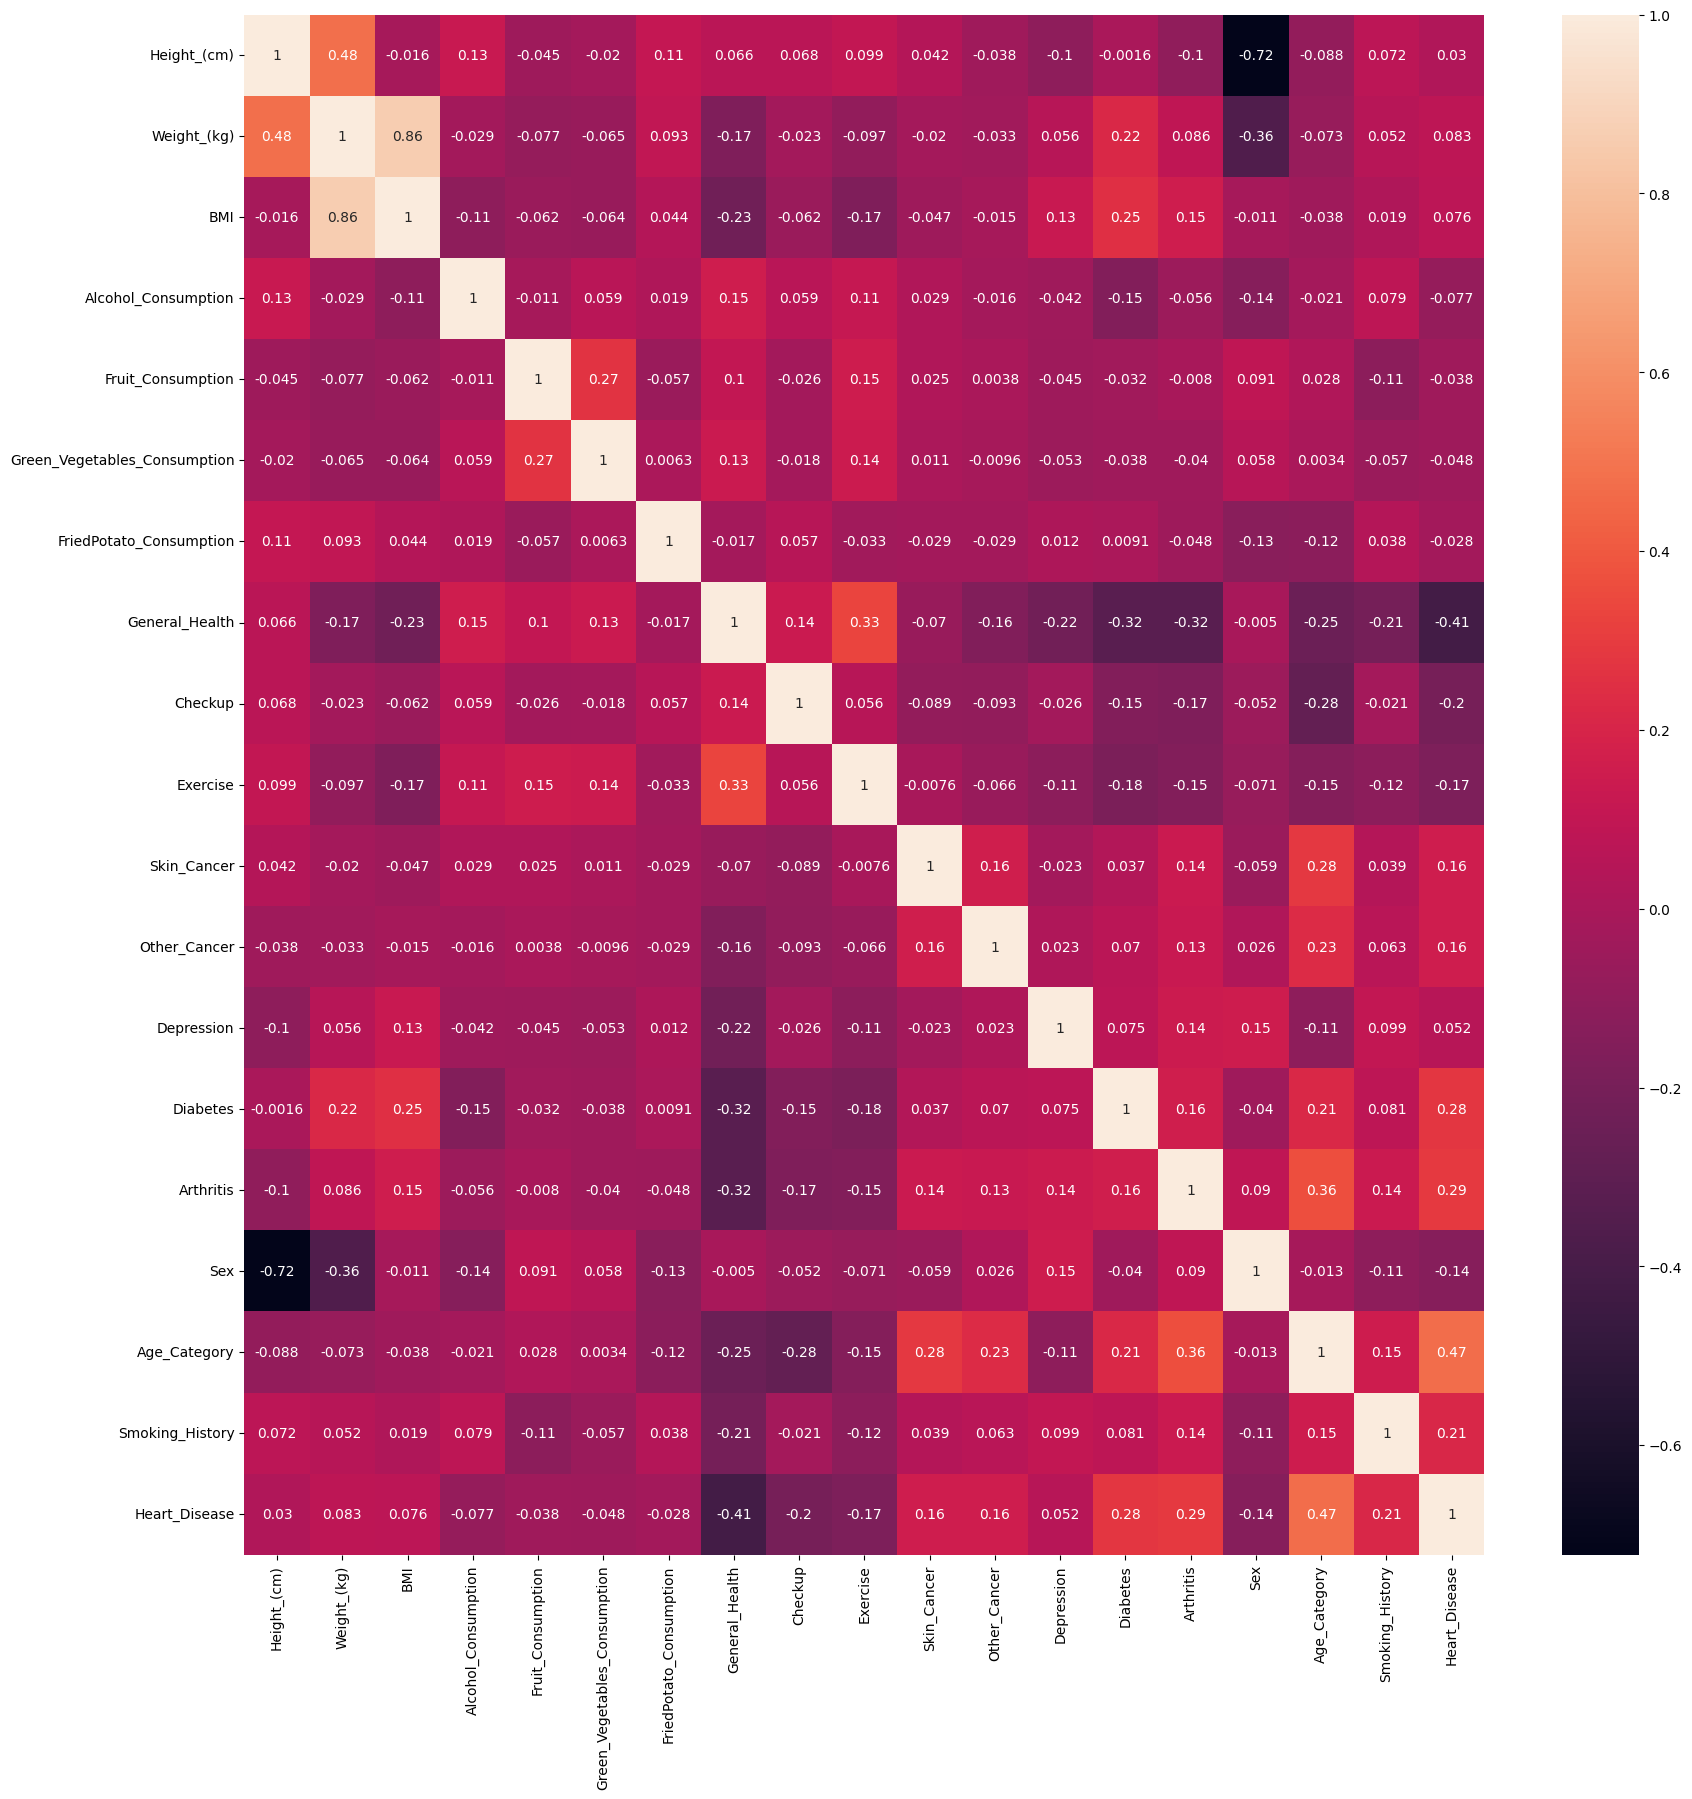

In [243]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

<Axes: >

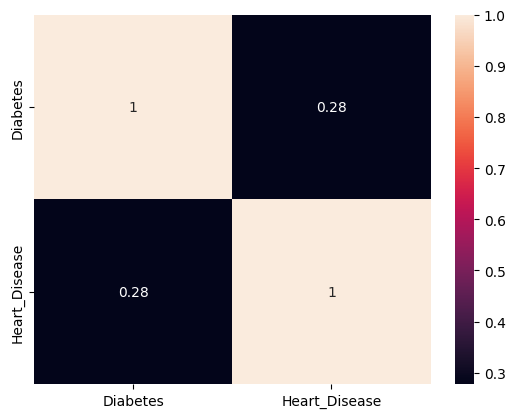

In [246]:
sns.heatmap(df[['Diabetes','Heart_Disease']].corr(),annot=True)

In [10]:
dataset = pd.read_csv('/config/workspace/CardioVascular_Disease_Prediction/notebooks/data/CVD_resampled.csv')
dataset.head()

,Unnamed: 0,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History,Heart_Disease
0,0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,1.0,0.0
1,1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,10.0,0.0,1.0
2,2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,3.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,8.0,0.0,0.0
3,3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,11.0,0.0,1.0
4,4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0,0.0


In [11]:
dataset.isna().sum()

Unnamed: 0                      0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
General_Health                  0
Checkup                         0
Exercise                        0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Smoking_History                 0
Heart_Disease                   0
dtype: int64

In [12]:
dataset = dataset.drop('Unnamed: 0',axis=1)
dataset.head()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History,Heart_Disease
0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,1.0,0.0
1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,10.0,0.0,1.0
2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,3.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,8.0,0.0,0.0
3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,11.0,0.0,1.0
4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0,0.0


In [13]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [14]:
numerical_features = [col for col in X.columns if X[col].dtype != 'O']
categorical_features = [col for col in X.columns if X[col].dtype == 'O']

In [15]:
numerical_features,categorical_features

(['Height_(cm)',
  'Weight_(kg)',
  'BMI',
  'Alcohol_Consumption',
  'Fruit_Consumption',
  'Green_Vegetables_Consumption',
  'FriedPotato_Consumption',
  'General_Health',
  'Checkup',
  'Exercise',
  'Skin_Cancer',
  'Other_Cancer',
  'Depression',
  'Diabetes',
  'Arthritis',
  'Sex',
  'Age_Category',
  'Smoking_History'],
 [])

In [16]:
        # General_Health_category =    {"Poor":0,'Fair':1,'Good':2,'Very Good':3,'Excellent':4} 
        # Checkup_category =           {'Never':0,'Within the past year':1,'Within the past 2 years':2,'Within the past 5 years':3,'5 or more years ago':4}
        # Exercise_category =          {'No':0,'Yes':1}
        # Skin_Cancer_category =       {'No':0,'Yes':1}
        # Other_Cancer_category =      {'No':0,'Yes':1}
        # Depression_category =        {'No':0,'Yes':1}
        # Diabetes_category =          {'No':0,'No, pre-diabetes or borderline diabetes':1,'Yes, but female told only during pregnancy':2,'Yes':3}
        # Arthritis_category =         {'No':0,'Yes':1}
        # Sex_category =               {'Male':0,'Female':1}
        # Age_Category_category =      {'18-24':0,'25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80+':12}
        # Smoking_History_category =   {'No':0,'Yes':1}

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [18]:
            num_pipeline = Pipeline(
            steps=[
                ('imputer',SimpleImputer(strategy='median')),
                ('scaler',StandardScaler())
            ]   
            )

            cat_pipeline = Pipeline(
                steps=[
                    ('imputer',SimpleImputer(strategy='most_frequent')),
                    # ('encoder',OrdinalEncoder(categories=[General_Health_category,Checkup_category,Exercise_category,Skin_Cancer_category,Other_Cancer_category,Depression_category,Diabetes_category,Arthritis_category,Sex_category,Age_Category_category,Smoking_History_category])),
                ]
            )

            preprocessor = ColumnTransformer([
                ('num_pipeline',num_pipeline,numerical_features),
                ('cat_pipeline',cat_pipeline,categorical_features)
            ])

In [19]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Height_(cm)', 'Weight_(kg)', 'BMI',
                                  'Alcohol_Consumption', 'Fruit_Consumption',
                                  'Green_Vegetables_Consumption',
                                  'FriedPotato_Consumption', 'General_Health',
                                  'Checkup', 'Exercise', 'Skin_Cancer',
                                  'Other_Cancer', 'Depression', 'Diabetes',
                                  'Arthritis', 'Sex', 'Age_Category',
                                  'Smoking_History']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 [])])

In [20]:
X_train

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
428811,158.757886,54.963225,21.750773,0.000000,30.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.585962,1.000000,11.414038,0.585962
483607,173.000000,89.021677,29.838465,6.512867,60.000000,14.512867,4.000000,3.000000,1.628217,1.000000,0.00000,0.628217,0.371783,1.115350,0.000000,0.000000,6.743567,0.371783
229466,180.000000,86.180000,26.500000,8.000000,16.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000
555456,173.448340,82.665489,27.524677,28.000000,5.000000,4.551660,27.758302,2.327491,1.000000,0.224170,0.22417,0.775830,0.000000,0.000000,0.224170,0.000000,10.775830,1.000000
501034,174.908015,74.944403,24.438069,0.000000,8.000000,8.000000,1.045992,0.000000,1.000000,0.000000,1.00000,0.954008,0.000000,2.862023,0.045992,0.000000,12.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,185.000000,97.070000,28.230000,16.000000,20.000000,12.000000,8.000000,3.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,9.000000,0.000000
259178,168.000000,90.720000,32.280000,4.000000,8.000000,8.000000,16.000000,1.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,0.000000
365838,165.000000,105.621072,38.749868,0.000000,29.142542,8.000000,2.286187,1.000000,1.000000,0.428729,0.00000,0.000000,0.571271,1.713813,0.571271,0.571271,6.000000,0.428729
131932,175.000000,92.990000,30.270000,2.000000,10.000000,12.000000,8.000000,4.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000


In [23]:
X_test.head()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
532448,175.000000,80.990720,26.365787,0.88569,30.0,30.000000,1.0,1.221423,1.000000,1.0,0.778577,0.778577,0.778577,0.0,0.0,0.0,11.221423,0.000000
467457,163.582192,73.230788,27.460000,1.00000,30.0,10.835615,4.0,2.708904,1.291096,1.0,0.000000,0.000000,0.000000,0.0,1.0,1.0,4.291096,0.291096
71649,175.000000,90.720000,29.530000,0.00000,8.0,30.000000,4.0,3.000000,1.000000,1.0,0.000000,0.000000,1.000000,0.0,1.0,1.0,0.000000,1.000000
212791,163.000000,72.570000,27.460000,20.00000,0.0,12.000000,4.0,2.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.0,1.0,1.0,10.000000,1.000000
51599,178.000000,83.910000,26.540000,12.00000,90.0,30.000000,12.0,3.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,7.000000,0.000000


In [24]:
y_train.head()

428811    1.0
483607    1.0
229466    0.0
555456    1.0
501034    1.0
Name: Heart_Disease, dtype: float64

In [25]:
y_test.head()

532448    1.0
467457    1.0
71649     0.0
212791    0.0
51599     0.0
Name: Heart_Disease, dtype: float64

In [26]:
X_train = preprocessor.fit_transform(X_train)
X_test  = preprocessor.transform(X_test)

In [27]:
model=  RandomForestClassifier()

In [28]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
y_pred=  model.predict(X_test)

In [30]:
accuracy_score(y_pred=y_pred,y_true=y_test)

0.9560435043046241

In [31]:
def evaluate_models(models):
    try:
        # logging.info("Initiate Evaluation of Models.")
        accuracy_score_list = []
        precision_score_list = []
        recall_score_list = []
        f1_score_list = []

        for i in range(len(list(models.keys()))):
            model = list(models.values())[i]

            model.fit(X_train,y_train)

            y_pred = model.predict(X_test)

            accuracy_score_list.append(accuracy_score(y_pred=y_pred, y_true=y_test))
            precision_score_list.append(precision_score(y_pred=y_pred, y_true=y_test))
            recall_score_list.append(recall_score(y_pred=y_pred, y_true=y_test))
            f1_score_list.append(f1_score(y_pred=y_pred, y_true=y_test))

        # logging.info("Evaluation of Models Terminated Successfully.")
        return (
            accuracy_score_list,
            precision_score_list,
            recall_score_list,
            f1_score_list
        )


    except Exception as e:
        # logging.info("Error occured in Model Evaluation Process.")
        raise CustomException(e, sys)

In [32]:
models = {
            'Logistic Regression'      : LogisticRegression(),
            'Decision Tree'            : DecisionTreeClassifier(),
            'Naive Bayes'              : GaussianNB(),
            'Random Forest Classifier' : RandomForestClassifier()
        }

accuracy_score_list, precision_score_list, recall_score_list, f1_score_list = evaluate_models(models)
best_score_index = accuracy_score_list.index(max(accuracy_score_list))

best_accuracy_score = accuracy_score_list[best_score_index]
            
model_precsison_score = precision_score_list[best_score_index]
            
model_recall_score = recall_score_list[best_score_index]
            
model_f1_score = f1_score_list[best_score_index]

model_name = list(models.keys())[best_score_index]

best_model = list(models.values())[best_score_index]

In [38]:
for i in range(len(accuracy_score_list)):
    print(list(models.keys())[i],":",accuracy_score_list[i])

Logistic Regression : 0.7792015597655654
Decision Tree : 0.9226107280863509
Naive Bayes : 0.7611667704161332
Random Forest Classifier : 0.9559436699122632


In [37]:
print(best_accuracy_score,model_name,model_precsison_score,model_recall_score,model_f1_score)

0.9559436699122632 Random Forest Classifier 0.9925353306595478 0.9190262532069681 0.954367396593674


In [2]:
import pandas as pd
df = pd.read_csv('/config/workspace/CardioVascular_Disease_Prediction/notebooks/data/CVD_resampled.csv')
df.head()

,Unnamed: 0,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,1.0,0.0
1,1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,10.0,0.0,1.0
2,2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,3.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,8.0,0.0,0.0
3,3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,11.0,0.0,1.0
4,4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0,0.0


In [3]:
df = df.drop('Unnamed: 0',axis=1)
df.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,1.0,0.0
1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,10.0,0.0,1.0
2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,3.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,8.0,0.0,0.0
3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,11.0,0.0,1.0
4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0,0.0


In [ ]:
General_Health_map =    {"Poor":0,'Fair':1,'Good':2,'Very Good':3,'Excellent':4} 
Checkup_map =           {'Never':0,'Within the past year':1,'Within the past 2 years':2,'Within the past 5 years':3,'5 or more years ago':4}
Exercise_map =          {'No':0,'Yes':1}
Skin_Cancer_map =       {'No':0,'Yes':1}
Other_Cancer_map =      {'No':0,'Yes':1}
Depression_map =        {'No':0,'Yes':1}
Diabetes_map =          {'No':0,'No, pre-diabetes or borderline diabetes':1,'Yes, but female told only during pregnancy':2,'Yes':3}
Arthritis_map =         {'No':0,'Yes':1}
Sex_map =               {'Male':0,'Female':1}
Age_Category_map =      {'18-24':0,'25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80+':12}
Smoking_History_map =   {'No':0,'Yes':1}

cat_cols = [cols for cols in dataset.columns if dataset[cols].dtype == 'O']

dataset[cat_cols[0]] = dataset[cols[0]].map(General_Health_map)
dataset[cat_cols[1]] = dataset[cols[1]].map(Checkup_map)
dataset[cat_cols[2]] = dataset[cols[2]].map(Exercise_map)
dataset[cat_cols[3]] = dataset[cols[3]].map(Skin_Cancer_map)
dataset[cat_cols[4]] = dataset[cols[4]].map(Other_Cancer_map)
dataset[cat_cols[5]] = dataset[cols[5]].map(Depression_map)
dataset[cat_cols[6]] = dataset[cols[6]].map(Diabetes_map)
dataset[cat_cols[7]] = dataset[cols[7]].map(Arthritis_map)
dataset[cat_cols[8]] = dataset[cols[8]].map(Sex_map)
dataset[cat_cols[9]] = dataset[cols[9]].map(Age_Category_map)
dataset[cat_cols[10]] = dataset[cols[10]].map(Smoking_History_map)